# SpeedDating. Model to predict the existence of match in a speed date

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('speeddating.csv')

In [4]:
pd.set_option('display.max_columns', None)

Source of the model: https://www.openml.org/d/40536

Author: Ray Fisman and Sheena Iyengar

Source: [Columbia Business School](http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/) - 2004

Please cite: None

This data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.

### Attribute Information
```
* gender: Gender of self
* age: Age of self
* age_o: Age of partner
* d_age: Difference in age
* race: Race of self
* race_o: Race of partner
* samerace: Whether the two persons have the same race or not.
* importance_same_race: How important is it that partner is of same race?
* importance_same_religion: How important is it that partner has same religion?
* field: Field of study
* pref_o_attractive: How important does partner rate attractiveness
* pref_o_sinsere: How important does partner rate sincerity
* pref_o_intelligence: How important does partner rate intelligence
* pref_o_funny: How important does partner rate being funny
* pref_o_ambitious: How important does partner rate ambition
* pref_o_shared_interests: How important does partner rate having shared interests
* attractive_o: Rating by partner (about me) at night of event on attractiveness
* sincere_o: Rating by partner (about me) at night of event on sincerity
* intelligence_o: Rating by partner (about me) at night of event on intelligence
* funny_o: Rating by partner (about me) at night of event on being funny
* ambitous_o: Rating by partner (about me) at night of event on being ambitious
* shared_interests_o: Rating by partner (about me) at night of event on shared interest
* attractive_important: What do you look for in a partner - attractiveness
* sincere_important: What do you look for in a partner - sincerity
* intellicence_important: What do you look for in a partner - intelligence
* funny_important: What do you look for in a partner - being funny
* ambtition_important: What do you look for in a partner - ambition
* shared_interests_important: What do you look for in a partner - shared interests
* attractive: Rate yourself - attractiveness
* sincere: Rate yourself - sincerity
* intelligence: Rate yourself - intelligence
* funny: Rate yourself - being funny
* ambition: Rate yourself - ambition
* attractive_partner: Rate your partner - attractiveness
* sincere_partner: Rate your partner - sincerity
* intelligence_partner: Rate your partner - intelligence
* funny_partner: Rate your partner - being funny
* ambition_partner: Rate your partner - ambition
* shared_interests_partner: Rate your partner - shared interests
* sports: Your own interests [1-10]
* tvsports
* exercise
* dining
* museums
* art
* hiking
* gaming
* clubbing
* reading
* tv
* theater
* movies
* concerts
* music
* shopping
* yoga
* interests_correlate: Correlation between participant’s and partner’s ratings of interests.
* expected_happy_with_sd_people: How happy do you expect to be with the people you meet during the speed-dating event?
* expected_num_interested_in_me: Out of the 20 people you will meet, how many do you expect will be interested in dating you?
* expected_num_matches: How many matches do you expect to get?
* like: Did you like your partner?
* guess_prob_liked: How likely do you think it is that your partner likes you?
* met: Have you met your partner before?
* decision: Decision at night of event.
* decision_o: Decision of partner at night of event.
* match: Match (yes/no)

In [5]:
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,35,20,20,20,0,5,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6,8,8,8,8,6,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],6,9,7,7,6,5,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,60,0,0,40,0,0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,10,7,7,5,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],7,8,7,8,5,6,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,[2-5],[2-5],Law,19,18,19,18,14,12,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10,10,10,10,10,10,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],5,8,9,8,5,7,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,30,5,15,40,5,5,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,9,8,9,8,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],7,6,8,7,6,8,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10]

Checking validity of the data. First, column types:

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

has_null                            int64
wave                                int64
gender                             object
age                                object
age_o                              object
d_age                               int64
d_d_age                            object
race                               object
race_o                             object
samerace                            int64
importance_same_race               object
importance_same_religion           object
d_importance_same_race             object
d_importance_same_religion         object
field                              object
pref_o_attractive                  object
pref_o_sincere                     object
pref_o_intelligence                object
pref_o_funny                       object
pref_o_ambitious                   object
pref_o_shared_interests            object
d_pref_o_attractive                object
d_pref_o_sincere                   object
d_pref_o_intelligence             

There seems to be a number of columns whose type is an object, but they actually look like numeric. We might need to convert them to numeric. Let's look at those rows where there are null values.

In [7]:
df[df['has_null']==1].head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,[2-5],[2-5],Law,19,18,19,18,14,12,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10,10,10,10,10,10,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],5,8,9,8,5,7,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
7,1,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,33.33,11.11,11.11,11.11,11.11,22.22,[21-100],[0-15],[0-15],[0-15],[0-15],[21-100],6,7,5,6,8,6,[6-8],[6-8],[0-5],[6-8],[6-8],[6-8],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],4,9,7,6,5,6,[0-5],[9-10],[6-8],[6-8],[0-5],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.5,[0.33-1],3,2,4,[0-4],[0-3],[3-5],6,7,[6-8],[7-10],?,0,0,0
20,1,1,female,25,27,2,[2-3],European/Caucasian-American,European/Caucasian-American,1,8,4,[6-10],[2-5],Economics,35,20,20,20,0,5,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],7,8,6,5,8,4,[6-8],[6-8],[6-8],[0-5],[6-8],[0-5],35,10,35,10,10,0,[21-100],[0-15],[21-100],[0-15],[0-15],[0-15],8,9,8,9,8,[6-8],[9-10],[6-8],[9-10],[6-8],7,9,10,7,8,9,[6-8],[9-10],[9-10],[6-8],[6-8],[9-10],3,8,7,8,5,5,8,4,5,7,8,7,7,7,5,8,7,[0-5],[6-8],[6-8],[6-8],[0-5],[0-5],[6-8],[0-5],[0-5],[6-8],[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],[6-8],-0.24,[-1-0],4,2,?,[0-4],[0-3],[0-2],8,7,[6-8],[7-10],1,0,0,0
21,1,1,female,25,22,3,[2-3],European/Caucasian-American,European/Caucasian-American,1,8,4,[6-10],[2-5],Economics,60,0,0,40,0,0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],6,7,10,6,6,5,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],35,10,35,10,10,0,[21-100],[0-15],[21-100],[0-15],[0-15],[0-15],8,9,8,9,8,[6-8],[9-10],[6-8],[9-10],[6-8],9,7,9,8,9,7,[9-10],[6-8],[9-10],[6-8],[9-10],[6-8],3,8,7,8,5,5,8,4,5,7,8,7,7,7,5,8,7,[0-5],[6-8],[6-8],[6-8],[0-5],[0-5],[6-8],[0-5],[0-5],[6-8],[6-8],[

The values are question marks. We will replace them for actual null values so we can operate with them.

In [8]:

nandf = df.replace(to_replace='?', value=np.nan)


Now let's check which columns have null values, and how many.

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nandf.isna().sum()/len(nandf))

has_null                           0.000000
wave                               0.000000
gender                             0.000000
age                                0.011339
age_o                              0.012413
d_age                              0.000000
d_d_age                            0.000000
race                               0.007520
race_o                             0.008713
samerace                           0.000000
importance_same_race               0.009429
importance_same_religion           0.009429
d_importance_same_race             0.000000
d_importance_same_religion         0.000000
field                              0.007520
pref_o_attractive                  0.010623
pref_o_sincere                     0.010623
pref_o_intelligence                0.010623
pref_o_funny                       0.011697
pref_o_ambitious                   0.012772
pref_o_shared_interests            0.015397
d_pref_o_attractive                0.000000
d_pref_o_sincere                

We'll set the threshold for unwanted columns at 10% of null values in a column.

In [10]:
for i in nandf.columns:
    if nandf[i].isna().sum()/len(nandf) > 0.1:
        nandf.drop(i,axis=1,inplace=True)

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nandf.isna().sum())

has_null                             0
wave                                 0
gender                               0
age                                 95
age_o                              104
d_age                                0
d_d_age                              0
race                                63
race_o                              73
samerace                             0
importance_same_race                79
importance_same_religion            79
d_importance_same_race               0
d_importance_same_religion           0
field                               63
pref_o_attractive                   89
pref_o_sincere                      89
pref_o_intelligence                 89
pref_o_funny                        98
pref_o_ambitious                   107
pref_o_shared_interests            129
d_pref_o_attractive                  0
d_pref_o_sincere                     0
d_pref_o_intelligence                0
d_pref_o_funny                       0
d_pref_o_ambitious       

Now let's see how many rows still have null values.

In [12]:
len(nandf[nandf.isna().any(axis=1)])/len(nandf)

0.2282167581761757

We can afford them. Let's clean the dataframe from null values anywhere.

In [13]:
nandf.dropna(axis=0,how='any',inplace=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nandf.isna().sum())

has_null                           0
wave                               0
gender                             0
age                                0
age_o                              0
d_age                              0
d_d_age                            0
race                               0
race_o                             0
samerace                           0
importance_same_race               0
importance_same_religion           0
d_importance_same_race             0
d_importance_same_religion         0
field                              0
pref_o_attractive                  0
pref_o_sincere                     0
pref_o_intelligence                0
pref_o_funny                       0
pref_o_ambitious                   0
pref_o_shared_interests            0
d_pref_o_attractive                0
d_pref_o_sincere                   0
d_pref_o_intelligence              0
d_pref_o_funny                     0
d_pref_o_ambitious                 0
d_pref_o_shared_interests          0
a

Now let's convert those columns to their true type.

In [14]:
nandf.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,35,20,20,20,0,5,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6,8,8,8,8,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],6,9,7,7,6,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,60,0,0,40,0,0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,10,7,7,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],7,8,7,8,5,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3,[0-4],[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,30,5,15,40,5,5,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,9,8,9,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],7,6,8,7,6,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.61,[0.33-1],3,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,[2-5],[2-5],Law,30,10,20,10,10,20,[21-100],[0-15],[16-20],[0-15],[0-15],[16-20],8,7,9,6,9,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,20,20,15,15,15,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],5,6,7,7,6,[0-5],[6-8],[6-8],[6-8],[6-8],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.21,[0-0.33],3,[0-4],[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1
5,0,1,female,21,25,4,[4-6],'Asian/Pacific Islander/Asian-Ameri

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nandf.dtypes)

has_null                            int64
wave                                int64
gender                             object
age                                object
age_o                              object
d_age                               int64
d_d_age                            object
race                               object
race_o                             object
samerace                            int64
importance_same_race               object
importance_same_religion           object
d_importance_same_race             object
d_importance_same_religion         object
field                              object
pref_o_attractive                  object
pref_o_sincere                     object
pref_o_intelligence                object
pref_o_funny                       object
pref_o_ambitious                   object
pref_o_shared_interests            object
d_pref_o_attractive                object
d_pref_o_sincere                   object
d_pref_o_intelligence             

In [16]:
# type([i for i in nandf.columns if i.startswith('d_') == False and i != 'gender'])
nandf['d_age_diff'] = nandf['d_d_age']
nandf['age_diff'] = pd.to_numeric(nandf['d_age'])
nandf.drop(columns=['d_age','d_d_age'],inplace=True)
nandf[[i for i in nandf.columns if i.startswith('d_') == False and i not in ['race','race_o','gender','field']]] = nandf[[i for i in nandf.columns if i.startswith('d_') == False and i not in ['race','race_o','gender','field']]].apply(pd.to_numeric)


In [17]:
nandf.head()

,has_null,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,d_age_diff,age_diff
0,0,1,female,21,27,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,35.0,20.0,20.0,20.0,0.0,5.0,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6.0,8.0,8.0,8.0,8.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],6.0,9.0,7.0,7.0,6.0,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0,1,0,0,[4-6],6
1,0,1,female,21,22,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,60.0,0.0,0.0,40.0,0.0,0.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,10.0,7.0,7.0,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],7.0,8.0,7.0,8.0,5.0,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1,1,0,0,[0-1],1
3,0,1,female,21,23,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,30.0,5.0,15.0,40.0,5.0,5.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,9.0,8.0,9.0,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],7.0,6.0,8.0,7.0,6.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.61,[0.33-1],3,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0,1,1,1,[2-3],2
4,0,1,female,21,24,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,[2-5],[2-5],Law,30.0,10.0,20.0,10.0,10.0,20.0,[21-100],[0-15],[16-20],[0-15],[0-15],[16-20],8.0,7.0,9.0,6.0,9.0,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6,8,8,8,7,[6-8],[6-8],[6-8],[6-8],[6-8],5.0,6.0,7.0,7.0,6.0,[0-5],[6-8],[6-8],[6-8],[6-8],[6-8],9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nandf.dtypes)

has_null                             int64
wave                                 int64
gender                              object
age                                  int64
age_o                                int64
race                                object
race_o                              object
samerace                             int64
importance_same_race                 int64
importance_same_religion             int64
d_importance_same_race              object
d_importance_same_religion          object
field                               object
pref_o_attractive                  float64
pref_o_sincere                     float64
pref_o_intelligence                float64
pref_o_funny                       float64
pref_o_ambitious                   float64
pref_o_shared_interests            float64
d_pref_o_attractive                 object
d_pref_o_sincere                    object
d_pref_o_intelligence               object
d_pref_o_funny                      object
d_pref_o_am

Let's look for multicollinearity among our variables.

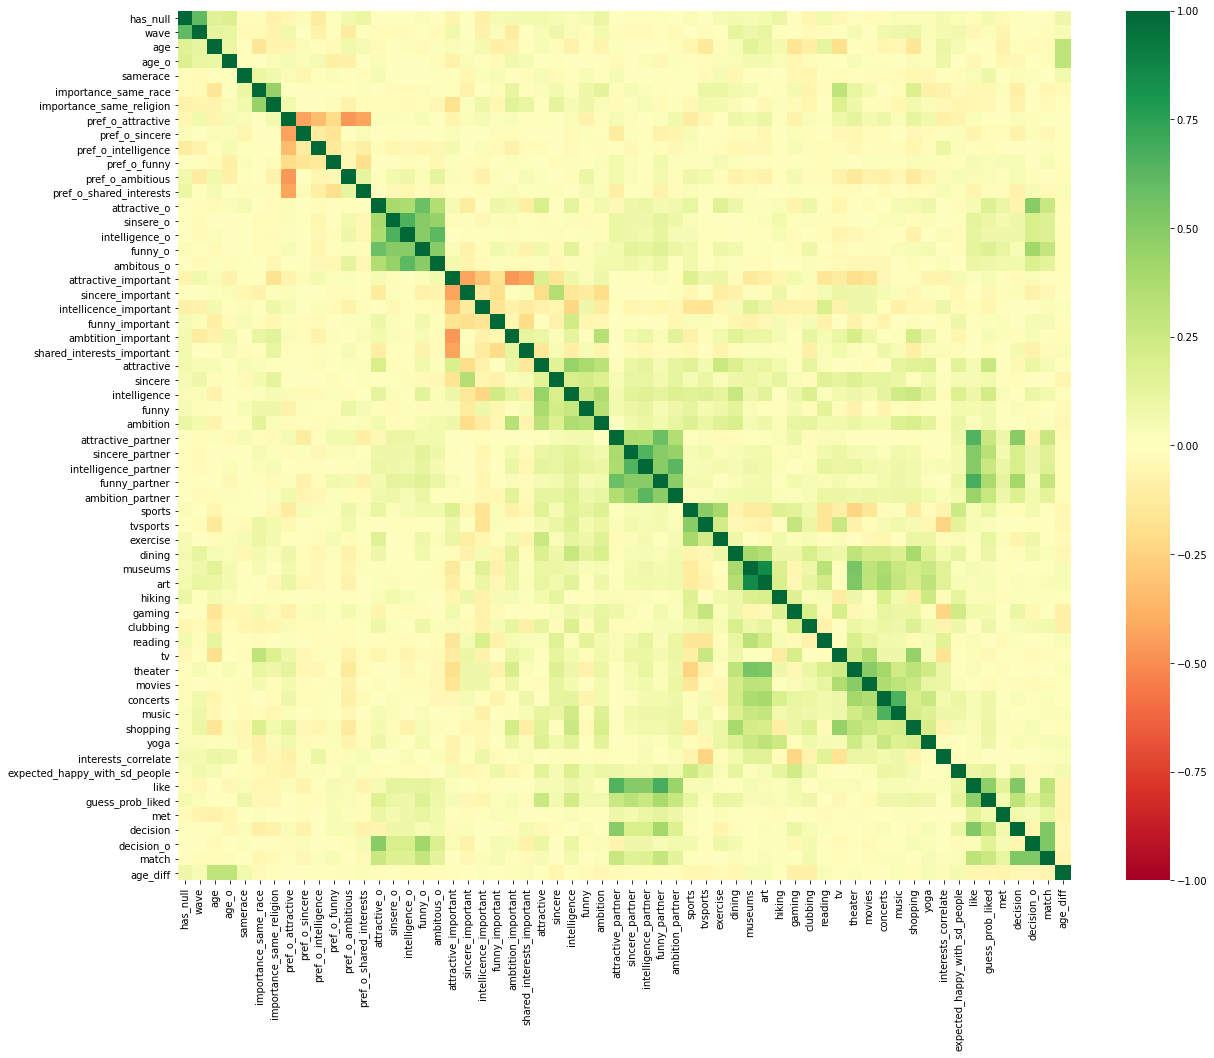

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

# Checking for multicollinearity
plt.figure(figsize=(20, 16))
corr = nandf.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, cmap = 'RdYlGn')
plt.show()


This does not give us much. Let's filter the correlation matrix.

In [20]:
corr

,has_null,wave,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,match,age_diff
has_null,1.000000,0.613481,0.158913,0.185302,-0.020210,-0.030597,-0.074920,-0.054650,0.028741,-0.119955,0.009209,0.073304,0.104186,-0.000448,0.002782,0.000958,0.028942,-0.001884,-0.065808,0.006987,-0.086366,0.052433,0.056028,0.069772,0.067948,0.050606,0.037645,0.050093,0.094539,0.001716,-0.008298,-0.013931,0.013980,0.000274,0.032924,0.003831,0.054128,0.058308,0.051916,0.065557,0.098942,-0.004542,-0.060237,0.062841,-0.039299,-0.013868,-0.026734,-0.024210,0.038312,0.036881,0.037577,0.061560,0.035563,-0.016139,0.060761,-0.038716,0.009027,0.000306,-0.006233,0.084758
wave,0.613481,1.000000,0.118730,0.112425,-0.032660,-0.035725,-0.067314,0.077617,0.001095,-0.081520,0.012374,-0.110291,0.010507,-0.029267,-0.036017,-0.038638,-0.013590,-0.033642,0.077752,0.004618,-0.079091,0.023695,-0.112978,0.002245,0.042858,0.084589,0.033590,-0.023294,0.064752,-0.026491,-0.033450,-0.038209,-0.009397,-0.036130,0.007327,-0.019321,0.007120,0.120585,0.080133,0.116016,0.008497,-0.002977,-0.031871,-0.016513,0.005952,0.048303,0.006277,0.077335,0.078440,0.101349,0.035869,0.060631,0.072195,-0.041669,0.026223,-0.067767,-0.006479,-0.006145,-0.024118,0.045455
age,0.158913,0.118730,1.000000,0.104270,-0.009080,-0.151834,-0.062571,-0.067424,0.033561,-0.011861,-0.031310,0.076238,0.054623,-0.035669,-0.003313,0.022996,-0.035949,0.022099,0.036999,0.020095,0.062282,-0.097219,-0.082775,0.012429,0.046415,-0.027127,-0.080571,-0.010371,-0.063436,0.021183,-0.004940,-0.005983,-0.002872,-0.026738,-0.061355,-0.139885,-0.030339,0.046412,0.143425,0.101568,0.056325,-0.162136,-0.095021,0.119615,-0.190287,0.008258,-0.030553,-0.061408,-0.043317,-0.155846,0.022560,0.093756,0.052855,0.006674,-0.007768,-0.075679,0.009474,-0.037767,-0.027427,0.302079
age_o,0.185302,0.112425,0.104270,1.000000,-0.010050,0.002166,0.035248,0.048125,0.025979,0.049671,-0.098737,-0.087710,0.000788,0.027680,-0.000499,-0.006795,-0.006091,-0.025096,-0.074381,0.038330,-0.009272,-0.032200,0.076264,0.053736,0.001027,0.014743,0.005488,0.005105,-0.005273,-0.038057,-0.004872,0.026467,-0.039609,0.022578,-0.008480,-0.025054,0.023714,0.037623,0.056568,0.057632,0.036849,-0.051897,-0.028817,0.013001,-0.001695,0.042377,0.010794,-0.009475,0.003292,0.031616,0.020117,0.088147,-0.006823,-0.039272,-0.003392,-0.051779,-0.044061,0.007311,-0.027493,0.298476
samerace,-0.020210,-0.032660,-0.009080,-0.010050,1.000000,0.102397,0.070886,0.031428,-0.061330,0.014261,0.030225,-0.011868,-0.017669,0.047266,0.002195,0.005941,0.007141,0.008496,0.012218,-0.052589,0.025387,0.041073,-0.005401,-0.017489,0.043245,-0.032976,-0.011798,0.045207,-0.012285,0.049013,-0.002737,0.006837,0.010417,0.012242,0.013077,-0.033974,0.051432,-0.051641,-0.004442,0.010069,0.006345,-0.048758,-0.059525,-0.010404,-0.023822,-0.010476,-0.018861,-0.022280,-0.032902,-0.050934,-0.045669,0.014713,-0.017916,0.036777,0.080277,0.006894,0.023453,0.022284,0.007455,0.067963
importance_same_race,-0.030597,-0.035725,-0.151834,0.002166,0.102397,1.000000,0.448535,0.001444,-0.001975,-0.010107,0.003064,-0.005906,0.018133,-0.002181,-0.018509,-0.023513,-0.016404,0.005288,-0.007843,-0.074472,0.005239,-0.015899,0.114773,-0.011021,0.029146,0.057736,0.019326,0.088952,0.138672,-0.029444,0.053862,0.025088,-0.009885,-0.001072,0.012846,0.101160,0.101598,0.062917,0.049504,0.003545

In [21]:
# Your code here:
filtered_corr = pd.DataFrame(index=corr.columns, columns=corr.columns)
high_coll = {'col1':[],'col2':[],'value':[]}
high_collin = []
for i in corr.columns:
    for j in corr.columns:
        if abs(corr.loc[i,j]) > 0.8 and abs(corr.loc[i,j]) < 1:
            high_collin.append({'field1':i,'field2':j,'value':corr.loc[i,j]})
            
pd.DataFrame(high_collin)

,field1,field2,value
0,museums,art,0.852315
1,art,museums,0.852315


The 'museums' column is highly correlated with 'art'. Could cause collinearity. Let's drop it.

In [22]:
nandf.drop(columns='museums',inplace=True)

### Preprocessing numerical variables

In [23]:
from sklearn.preprocessing import StandardScaler
data_num = nandf.select_dtypes(include = np.number).drop(columns = 'match')
data_num.head()

,has_null,wave,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,sports,tvsports,exercise,dining,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,age_diff
0,0,1,21,27,0,2,4,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6,8,8,8,7,6.0,9.0,7.0,7.0,6.0,9,2,8,9,1,5,1,5,6,9,1,10,10,9,8,1,0.14,3,7.0,6.0,0,1,0,6
1,0,1,21,22,0,2,4,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6,8,8,8,7,7.0,8.0,7.0,8.0,5.0,9,2,8,9,1,5,1,5,6,9,1,10,10,9,8,1,0.54,3,7.0,5.0,1,1,0,1
3,0,1,21,23,0,2,4,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,15.0,20.0,20.0,15.0,15.0,15.0,6,8,8,8,7,7.0,6.0,8.0,7.0,6.0,9,2,8,9,1,5,1,5,6,9,1,10,10,9,8,1,0.61,3,7.0,6.0,0,1,1,2
4,0,1,21,24,0,2,4,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,15.0,20.0,20.0,15.0,15.0,15.0,6,8,8,8,7,5.0,6.0,7.0,7.0,6.0,9,2,8,9,1,5,1,5,6,9,1,10,10,9,8,1,0.21,3,6.0,6.0,0,1,1,3
5,0,1,21,25,0,2,4,50.0,0.0,30.0,10.0,0.0,10.0,7.0,7.0,8.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6,8,8,8,7,4.0,9.0,7.0,4.0,6.0,9,2,8,9,1,5,1,5,6,9,1,10,10,9,8,1,0.25,3,6.0,5.0,0,0,1,4


In [24]:
# Standardizing data
transformer = StandardScaler().fit(data_num)
data_num_standardized = transformer.transform(data_num)
x = pd.DataFrame(data_num_standardized, columns = data_num.columns)
x.head()

,has_null,wave,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,sports,tvsports,exercise,dining,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,age_diff
0,-2.27373,-1.722108,-1.507382,0.207093,-0.807215,-0.640404,0.119712,1.044922,0.366987,-0.056169,0.414610,-1.767489,-1.084831,-0.108317,0.471943,0.398149,0.81569,0.676411,-0.603667,0.359637,-0.071979,-0.402662,0.701885,0.504254,-0.79698,-0.226159,0.171848,-0.404792,-0.327641,-0.103126,1.051836,-0.256343,0.299849,-0.449955,0.983309,-0.921458,0.715447,0.670277,-2.583902,-0.26451,-1.109705,-0.305146,-0.852706,1.427799,-2.612382,1.225389,1.463144,0.643773,0.86909,-1.237828,-0.189312,-1.446757,0.468075,0.345402,-0.193479,1.144601,-0.871468,0.810175
1,-2.27373,-1.722108,-1.507382,-1.233381,-0.807215,-0.640404,0.119712,3.086892,-2.487674,-2.972214,3.671094,-1.767489,-1.879730,0.408986,0.471943,1.705131,0.29815,0.115144,-0.603667,0.359637,-0.071979,-0.402662,0.701885,0.504254,-0.79698,-0.226159,0.171848,-0.404792,-0.327641,0.414224,0.472001,-0.256343,0.819363,-1.011889,0.983309,-0.921458,0.715447,0.670277,-2.583902,-0.26451,-1.109705,-0.305146,-0.852706,1.427799,-2.612382,1.225389,1.463144,0.643773,0.86909,-1.237828,1.127268,-1.446757,0.468075,-0.127770,3.540962,1.144601,-0.871468,-0.879584
2,-2.27373,-1.722108,-1.507382,-0.945286,-0.807215,-0.640404,0.119712,0.636528,-1.774008,-0.785180,3.671094,-0.944514,-1.084831,0.408986,0.471943,1.051640,0.81569,1.237679,-0.603667,0.359637,-0.071979,-0.402662,0.701885,0.504254,-0.79698,-0.226159,0.171848,-0.404792,-0.327641,0.414224,-0.687668,0.399838,0.299849,-0.449955,0.983309,-0.921458,0.715447,0.670277,-2.583902,-0.26451,-1.109705,-0.305146,-0.852706,1.427799,-2.612382,1.225389,1.463144,0.643773,0.86909,-1.237828,1.357670,-1.446757,0.468075,0.345402,-0.193479,1.144601,1.147490,-0.541632
3,-2.27373,-1.722108,-1.507382,-0.657191,-0.807215,-0.640404,0.119712,0.636528,-1.060343,-0.056169,-1.213632,-0.121540,1.299868,0.926289,-0.106173,1.051640,-0.21939,1.237679,-0.603667,0.359637,-0.071979,-0.402662,0.701885,0.504254,-0.79698,-0.226159,0.171848,-0.404792,-0.327641,-0.620476,-0.687668,-0.256343,0.299849,-0.449955,0.983309,-0.921458,0.715447,0.670277,-2.583902,-0.26451,-1.109705,-0.305146,-0.852706,1.427799,-2.612382,1.225389,1.463144,0.643773,0.86909,-1.237828,0.041090,-1.446757,-0.083585,0.345402,-0.193479,1.144601,1.147490,-0.203680
4,-2.27373,-1.722108,-1.507382,-0.369097,-0.807215,-0.640404,0.119712,2.270104,-2.487674,1.401854,-1.213632,-1.767489,-0.289931,0.408986,-0.106173,0.398149,0.81569,0.115144,-0.603667,0.359637,-0.071979,-0.402662,0.701885,0.504254,-0.79698,-0.226159,0.171848,-0.404792,-0.327641,-1.137827,1.051836,-0.256343,-1.258692,-0.449955,0.983309,-0.921458,0.715447,0.670277,-2.583902,-0.26451,-1.109705,-0.305146,-0.852706,1.427799,-2.612382,1.225389,1.463144,0.643773,0.86909,-1.237828,0.172748,-1.446757,-0.083585,-0.127770,-0.193479,-0.873667,1.147490,0.134271


In [25]:
x.importance_same_race.value_counts()

-0.992367    2123
-0.288440     812
-0.640404     750
 1.471377     537
 0.415487     513
 0.767450     437
 1.119414     416
 0.063523     355
 1.823341     347
 2.175304     170
-1.344331       6
Name: importance_same_race, dtype: int64

Working with the 'field' field (that is, the field of studies / work of the individual) so we're able to manage them in our dummies generator.

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nandf.field.value_counts())

Business                                                      403
MBA                                                           392
Law                                                           376
'Social Work'                                                 282
'International Affairs'                                       214
'Electrical Engineering'                                      130
Psychology                                                    106
Finance                                                       101
law                                                            94
Sociology                                                      84
Film                                                           81
business                                                       79
Biology                                                        77
Mathematics                                                    71
Biochemistry                                                   58
'Business 

In [27]:
nandf['field'] = nandf['field'].str.lower()
nandf['field'] = np.where(nandf['field'].str.contains('business|finan|economics|mba|marketing|consulting'), "business/finance/economics", nandf['field'])
nandf['field'] = np.where(nandf['field'].str.contains('physics|math|mba'), "math and similar", nandf['field'])
nandf['field'] = np.where(nandf['field'].str.contains('public|policy|politi|internation|affair'), "political science/international relations/etc", nandf['field'])
nandf['field'] = np.where(nandf['field'].str.contains('engineering|engg|computer'), "engineering", nandf['field'])
nandf['field'] = np.where(nandf['field'].str.contains('law'), "law", nandf['field'])
nandf['field'] = np.where(nandf['field'].str.contains('education'), "education", nandf['field'])
nandf['field'] = np.where(nandf['field'].str.contains('medicine|health'), "medicine and health education", nandf['field'])
nandf['field'] = np.where(nandf['field'].str.contains('bio|chem|neuro|epidem|nutri'), "natural sciences", nandf['field'])
nandf['field'] = np.where(nandf['field'].str.contains('social|sociol|psycho'), "social sciences", nandf['field'])
nandf['field'] = np.where(nandf['field'].str.contains('film|cine|thea|writi|acting|art'), "arts", nandf['field'])
nandf['field'] = np.where(nandf['field'].str.contains('journ|philo|litera|english|french|history|human|relig|anthro'), "humanities", nandf['field'])
nandf['field'] = np.where(nandf['field'].isin(["business/finance/economics","math and similar","engineering","education","law","medicine and health education","natural sciences","social sciences","arts","humanities","political science/international relations/etc"]),nandf['field'],"Other")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nandf['field'].value_counts())

business/finance/economics                       1480
social sciences                                   755
political science/international relations/etc     646
natural sciences                                  601
law                                               525
arts                                              494
engineering                                       486
Other                                             474
education                                         420
humanities                                        327
math and similar                                  258
Name: field, dtype: int64


### Processing and getting dummies for categorical variables

In [28]:
from sklearn.preprocessing import OneHotEncoder
cat = nandf.select_dtypes(include = np.object)
cat.head()

enc = OneHotEncoder(drop = 'first')
categorical = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names(cat.columns))
categorical.head()

,gender_male,race_'Black/African American',race_'Latino/Hispanic American',race_European/Caucasian-American,race_Other,race_o_'Black/African American',race_o_'Latino/Hispanic American',race_o_European/Caucasian-American,race_o_Other,d_importance_same_race_[2-5],d_importance_same_race_[6-10],d_importance_same_religion_[2-5],d_importance_same_religion_[6-10],field_arts,field_business/finance/economics,field_education,field_engineering,field_humanities,field_law,field_math and similar,field_natural sciences,field_political science/international relations/etc,field_social sciences,d_pref_o_attractive_[16-20],d_pref_o_attractive_[21-100],d_pref_o_sincere_[16-20],d_pref_o_sincere_[21-100],d_pref_o_intelligence_[16-20],d_pref_o_intelligence_[21-100],d_pref_o_funny_[16-20],d_pref_o_funny_[21-100],d_pref_o_ambitious_[16-20],d_pref_o_ambitious_[21-100],d_pref_o_shared_interests_[16-20],d_pref_o_shared_interests_[21-100],d_attractive_o_[6-8],d_attractive_o_[9-10],d_sinsere_o_[6-8],d_sinsere_o_[9-10],d_intelligence_o_[6-8],d_intelligence_o_[9-10],d_funny_o_[6-8],d_funny_o_[9-10],d_ambitous_o_[6-8],d_ambitous_o_[9-10],d_shared_interests_o_[6-8],d_shared_interests_o_[9-10],d_attractive_important_[16-20],d_attractive_important_[21-100],d_sincere_important_[16-20],d_sincere_important_[21-100],d_intellicence_important_[16-20],d_intellicence_important_[21-100],d_funny_important_[16-20],d_funny_important_[21-100],d_ambtition_important_[16-20],d_ambtition_important_[21-100],d_shared_interests_important_[16-20],d_shared_interests_important_[21-100],d_attractive_[6-8],d_attractive_[9-10],d_sincere_[6-8],d_sincere_[9-10],d_intelligence_[6-8],d_intelligence_[9-10],d_funny_[6-8],d_funny_[9-10],d_ambition_[6-8],d_ambition_[9-10],d_attractive_partner_[6-8],d_attractive_partner_[9-10],d_sincere_partner_[6-8],d_sincere_partner_[9-10],d_intelligence_partner_[6-8],d_intelligence_partner_[9-10],d_funny_partner_[6-8],d_funny_partner_[9-10],d_ambition_partner_[6-8],d_ambition_partner_[9-10],d_shared_interests_partner_[6-8],d_shared_interests_partner_[9-10],d_sports_[6-8],d_sports_[9-10],d_tvsports_[6-8],d_tvsports_[9-10],d_exercise_[6-8],d_exercise_[9-10],d_dining_[6-8],d_dining_[9-10],d_museums_[6-8],d_museums_[9-10],d_art_[6-8],d_art_[9-10],d_hiking_[6-8],d_hiking_[9-10],d_gaming_[6-8],d_gaming_[9-10],d_clubbing_[6-8],d_clubbing_[9-10],d_reading_[6-8],d_reading_[9-10],d_tv_[6-8],d_tv_[9-10],d_theater_[6-8],d_theater_[9-10],d_movies_[6-8],d_movies_[9-10],d_concerts_[6-8],d_concerts_[9-10],d_music_[6-8],d_music_[9-10],d_shopping_[6-8],d_shopping_[9-10],d_yoga_[6-8],d_yoga_[9-10],d_interests_correlate_[0-0.33],d_interests_correlate_[0.33-1],d_expected_happy_with_sd_people_[5-6],d_expected_happy_with_sd_people_[7-10],d_expected_num_interested_in_me_[10-20],d_expected_num_interested_in_me_[4-9],d_expected_num_matches_[3-5],d_expected_num_matches_[5-18],d_like_[6-8],d_like_[9-10],d_guess_prob_liked_[5-6],d_guess_prob_liked_[7-10],d_age_diff_[2-3],d_age_diff_[4-6],d_age_diff_[7-37]
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

In [29]:
print(nandf.shape)
print(x.shape)
print(categorical.shape)
print(nandf['match'].head())

(6466, 118)
(6466, 58)
(6466, 130)
0    0
1    0
3    1
4    1
5    0
Name: match, dtype: int64


In [30]:
rdf = pd.concat((x, categorical,nandf['match'].reset_index()), axis=1)
rdf.head()

,has_null,wave,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,sports,tvsports,exercise,dining,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,age_diff,gender_male,race_'Black/African American',race_'Latino/Hispanic American',race_European/Caucasian-American,race_Other,race_o_'Black/African American',race_o_'Latino/Hispanic American',race_o_European/Caucasian-American,race_o_Other,d_importance_same_race_[2-5],d_importance_same_race_[6-10],d_importance_same_religion_[2-5],d_importance_same_religion_[6-10],field_arts,field_business/finance/economics,field_education,field_engineering,field_humanities,field_law,field_math and similar,field_natural sciences,field_political science/international relations/etc,field_social sciences,d_pref_o_attractive_[16-20],d_pref_o_attractive_[21-100],d_pref_o_sincere_[16-20],d_pref_o_sincere_[21-100],d_pref_o_intelligence_[16-20],d_pref_o_intelligence_[21-100],d_pref_o_funny_[16-20],d_pref_o_funny_[21-100],d_pref_o_ambitious_[16-20],d_pref_o_ambitious_[21-100],d_pref_o_shared_interests_[16-20],d_pref_o_shared_interests_[21-100],d_attractive_o_[6-8],d_attractive_o_[9-10],d_sinsere_o_[6-8],d_sinsere_o_[9-10],d_intelligence_o_[6-8],d_intelligence_o_[9-10],d_funny_o_[6-8],d_funny_o_[9-10],d_ambitous_o_[6-8],d_ambitous_o_[9-10],d_shared_interests_o_[6-8],d_shared_interests_o_[9-10],d_attractive_important_[16-20],d_attractive_important_[21-100],d_sincere_important_[16-20],d_sincere_important_[21-100],d_intellicence_important_[16-20],d_intellicence_important_[21-100],d_funny_important_[16-20],d_funny_important_[21-100],d_ambtition_important_[16-20],d_ambtition_important_[21-100],d_shared_interests_important_[16-20],d_shared_interests_important_[21-100],d_attractive_[6-8],d_attractive_[9-10],d_sincere_[6-8],d_sincere_[9-10],d_intelligence_[6-8],d_intelligence_[9-10],d_funny_[6-8],d_funny_[9-10],d_ambition_[6-8],d_ambition_[9-10],d_attractive_partner_[6-8],d_attractive_partner_[9-10],d_sincere_partner_[6-8],d_sincere_partner_[9-10],d_intelligence_partner_[6-8],d_intelligence_partner_[9-10],d_funny_partner_[6-8],d_funny_partner_[9-10],d_ambition_partner_[6-8],d_ambition_partner_[9-10],d_shared_interests_partner_[6-8],d_shared_interests_partner_[9-10],d_sports_[6-8],d_sports_[9-10],d_tvsports_[6-8],d_tvsports_[9-10],d_exercise_[6-8],d_exercise_[9-10],d_dining_[6-8],d_dining_[9-10],d_museums_[6-8],d_museums_[9-10],d_art_[6-8],d_art_[9-10],d_hiking_[6-8],d_hiking_[9-10],d_gaming_[6-8],d_gaming_[9-10],d_clubbing_[6-8],d_clubbing_[9-10],d_reading_[6-8],d_reading_[9-10],d_tv_[6-8],d_tv_[9-10],d_theater_[6-8],d_theater_[9-10],d_movies_[6-8],d_movies_[9-10],d_concerts_[6-8],d_concerts_[9-10],d_music_[6-8],d_music_[9-10],d_shopping_[6-8],d_shopping_[9-10],d_yoga_[6-8],d_yoga_[9-10],d_interests_correlate_[0-0.33],d_interests_correlate_[0.33-1],d_expected_happy_with_sd_people_[5-6],d_expected_happy_with_sd_people_[7-10],d_expected_num_interested_in_me_[10-20],d_expected_num_interested_in_me_[4-9],d_expected_num_matches_[3-5],d_expected_num_matches_[5-18],d_like_[6-8],d_like_[9-10],d_guess_prob_liked_[5-6],d_guess_prob_liked_[7-10],d_age_diff_[2-3],d_age_diff_[4-6],d_age_diff_[7-37],index,match
0,-2.27373,-1.722108,-1.507382,0.207093,-0.807215,-0.640404,0.119712,1.044922,0.366987,-0.056169,0.414610,-1.767489,-1.084831,-0.108317,0.471943,0.398149,0.81569,0.676411,-0.603667,0.359637,-0.071979,-0.402662,0.701885,0.504254,-0.79698,-0.226159,0.171848,-0.404792,-0.

### Training the model 

We have two options about numerical columns: take them or use those where values are converted to a category. 

For the first one, we're going to use the numerical ones.

In [90]:
X = rdf[[i for i in rdf.columns if i != 'match' and i.startswith('d_') == False and i != 'index']].drop(columns=['decision','decision_o']) 
## decision and decision_o are proxies for match.
y = rdf['match'].astype('int')

In [146]:
y.value_counts()/len(y)

0    0.827869
1    0.172131
Name: match, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

### Applying Logistic Regression model

In [145]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [105]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [106]:
logreg.score(X_test, y_test)

0.8379214351995051

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_logr = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred_logr))
print(accuracy_score(y_test, y_pred_logr))

[[2529   96]
 [ 428  180]]
0.8379214351995051


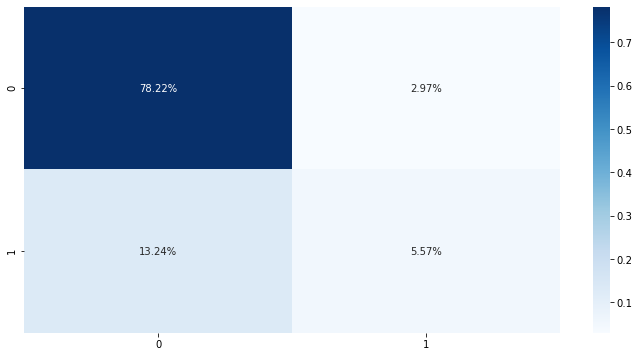

In [108]:
plt.rcParams['figure.figsize'] = [12, 6]
sns.heatmap(confusion_matrix(y_test, y_pred_logr)/np.sum(confusion_matrix(y_test, y_pred_logr)), annot=True, 
            fmt='.2%', cmap='Blues')

### Applying Decision Tree model

In [97]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [98]:
y_pred_dt = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.7822455923291061

In [99]:
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))

[[2274  351]
 [ 353  255]]
0.7822455923291061


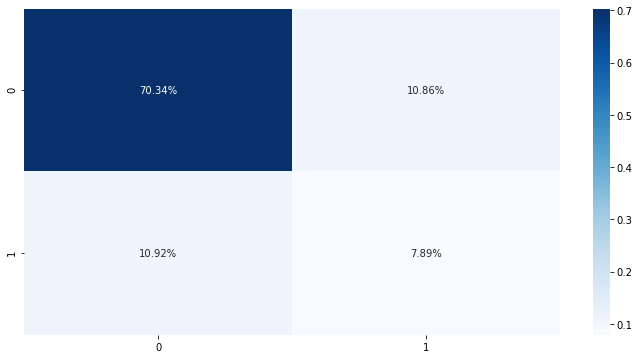

In [103]:
plt.rcParams['figure.figsize'] = [12, 6]
sns.heatmap(confusion_matrix(y_test, y_pred_dt)/np.sum(confusion_matrix(y_test, y_pred_dt)), annot=True, 
            fmt='.2%', cmap='Blues')

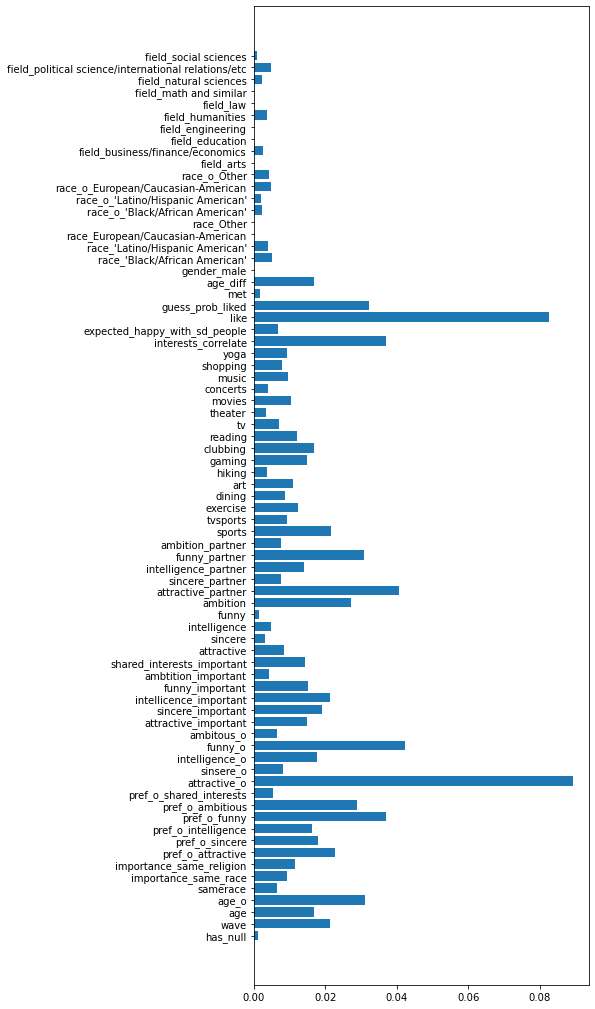

In [102]:
plt.rcParams['figure.figsize'] = [6, 18]
plt.barh(width = decisiontree.feature_importances_, y = X.columns)
plt.show()

### Applying SVM

In [42]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(svm.score(X_test, y_test))

0.8119393751933189


In [43]:
print(confusion_matrix(y_test, y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))

[[2625    0]
 [ 608    0]]
0.8119393751933189


### Applying K-Neighbors Classifier

In [142]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_kn = nearest_neighbors.predict(X_test)
print(nearest_neighbors.score(X_test, y_test))
print(pd.Series(y_pred_kn).value_counts())

0.8023507578100835
0    2920
1     313
dtype: int64


In [143]:
print(confusion_matrix(y_test, y_pred_kn))
print(accuracy_score(y_test, y_pred_kn))

[[2453  172]
 [ 467  141]]
0.8023507578100835


## Model Evaluation

### Creating the Confusion Matrix

In [109]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression().fit(X_train, y_train)

In [110]:
y_pred_log = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

0.8379214351995051

In [111]:
pd.Series(y_pred_log).value_counts()

0    2957
1     276
dtype: int64

In [112]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_log)
print(cf_matrix)

[[2529   96]
 [ 428  180]]


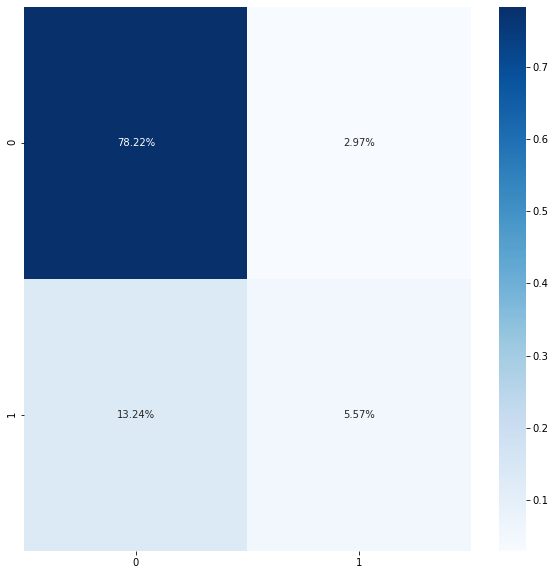

In [113]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### Precision, Recall and the F1 Score

In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score
# We need to assign which is the 'positive class'. Here, we are trying to predict whether a customer will run into
# problems repaying their loan. So Status B is the 'positive' class (meaning credit problems = True)
print(precision_score(y_test, y_pred_log, pos_label=1))
print(recall_score(y_test, y_pred_log, pos_label=1))
print(f1_score(y_test, y_pred_log, pos_label=1))

0.6521739130434783
0.29605263157894735
0.40723981900452483


In [115]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred_log)

0.6297406015037594

In [60]:
# balanced accuracy score: average of recall for the two classes
print(recall_score(y_test, y_pred_log, pos_label=1))
print(recall_score(y_test, y_pred_log, pos_label=0))

0.2911184210526316
0.9619047619047619


#### ROC and AUC analysis

In [135]:
from sklearn.metrics import roc_curve, roc_auc_score
#help(roc_curve)

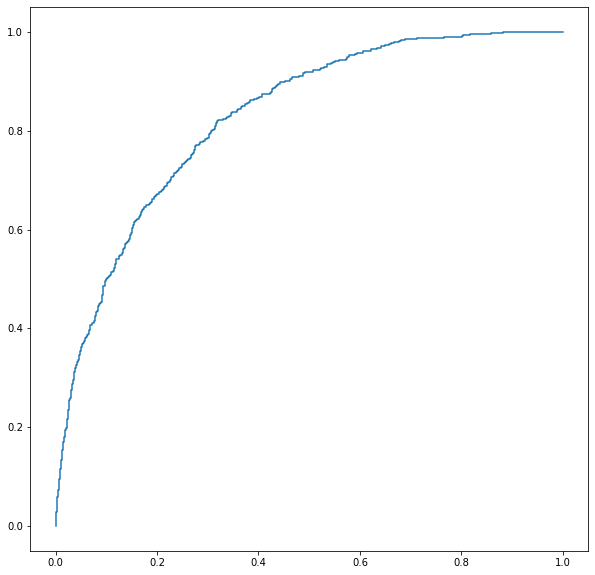

In [136]:
# we need to calculate class probabilities!
y_pred_proba = logisticr.predict_proba(X_test)[:,1]
y_pred_proba
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1) 
plt.plot(fpr,tpr)

In [137]:
logisticr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [138]:
logisticr.predict_proba(X_test)[:,1]

array([0.00783524, 0.35965757, 0.07237836, ..., 0.02205323, 0.00560924,
       0.05533652])

In [139]:
#help(logisticr.predict_proba)

In [140]:
#help(roc_auc_score)

In [141]:
roc_auc_score(y_test, y_pred_proba)

0.8265670426065164

### Repeating all the steps for a Decision Tree for comparison:

In [119]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [127]:
y_pred_dt = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.7831735230436128

In [128]:
cf_matrix = confusion_matrix(y_test, y_pred_dt)
print(cf_matrix)

[[2269  356]
 [ 345  263]]


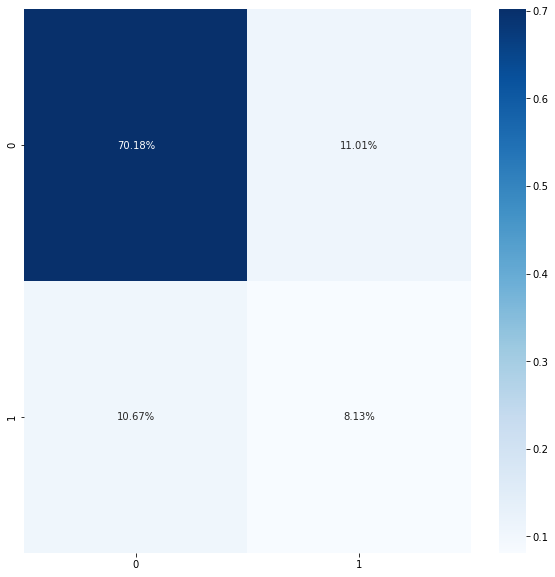

In [129]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [130]:
print(precision_score(y_test, y_pred_dt, pos_label=1))
print(recall_score(y_test, y_pred_dt, pos_label=1))
print(f1_score(y_test, y_pred_dt, pos_label=1))

0.42487883683360256
0.43256578947368424
0.42868785656071723


In [131]:
balanced_accuracy_score(y_test, y_pred_dt)

0.6484733709273183

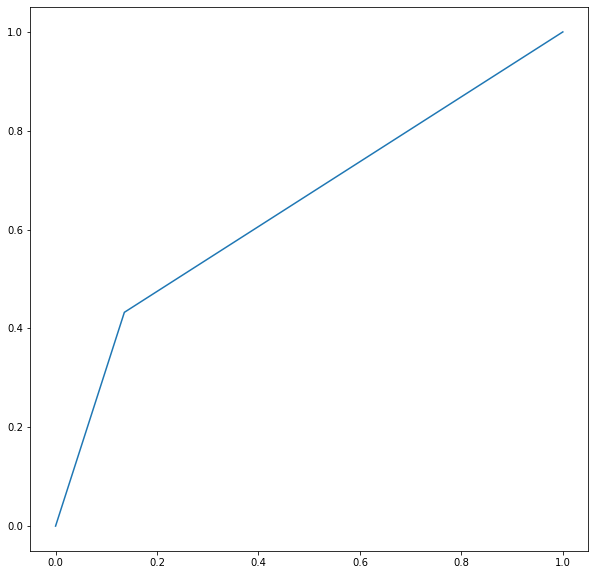

In [132]:
y_pred_proba = decisiontree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1) 
# we need to assign which one is the "positive" (1) category
plt.plot(fpr,tpr)

In [133]:
roc_auc_score(y_test, y_pred_proba)

0.6484733709273184

### Hyperparameter Tuning

Can we do even better?

In [77]:
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either e

In [54]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [78]:
param_grid = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [3, 10, None]}

tune = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid,
                       cv=3)

tune.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, None],
                         'splitter': ['best', 'random']})

In [79]:
tune.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

In [80]:
decisiontree_opt = DecisionTreeClassifier(**tune.best_params_).fit(X_train, y_train)

In [82]:
y_pred_dt_opt = decisiontree_opt.predict(X_test)
decisiontree_opt.score(X_test, y_test)

0.8236931642437365

In [84]:
cf_matrix = confusion_matrix(y_test, y_pred_dt_opt)
print(cf_matrix)

[[2433  192]
 [ 378  230]]


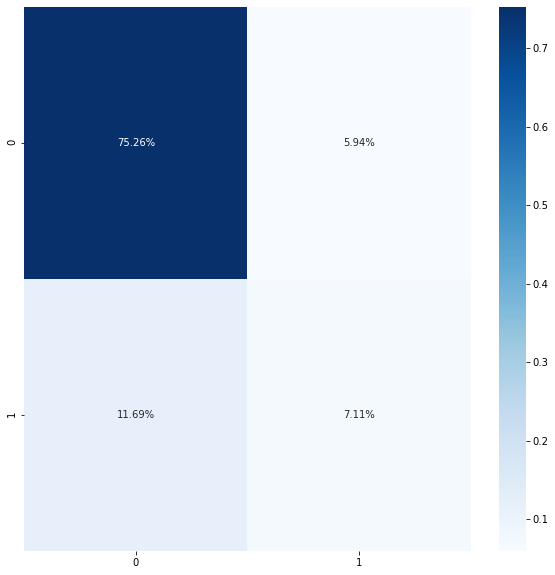

In [85]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [87]:
print(precision_score(y_test, y_pred_dt_opt, pos_label=1))
print(recall_score(y_test, y_pred_dt_opt, pos_label=1))
print(f1_score(y_test, y_pred_dt_opt, pos_label=1))

0.5450236966824644
0.3782894736842105
0.4466019417475728


In [88]:
balanced_accuracy_score(y_test, y_pred_dt_opt)

0.6525733082706766